<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project: Ames Housing Data and Kaggle Challenge


## Problem Statement

We are consultants hired by A real estate developer, researching on what factors impact the sale price most


how to allocate resources to improve participation rates and/or scores for SAT and/or ACT in the United States.
In this project, we intend to evaluate if there is a ACT score bias for households with higher or lower median income. Specifically, we will explore the association of statewide ACT mean score and median family income, and try to establish a linear regression model between them


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Hypothesis Test](#Hypothesis-Test)
- [Linear regression model](#Linear-regression-model)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Data Visualization](#Visualize-the-Data)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).


Many colleges and universities have implemented different test optional policies due to COVID-19 restrictions([Source](https://www.crimsoneducation.org/sg/blog/test-prep/the-complete-list-of-us-universities-going-test-optional-in-2021-22/)):
- Test-optional: Those colleges accept but do not require scores.
- Test-Flexibale: Students can provide other scores such as IB grades to replace SAT/ACT
- Test-Blind: Those colleges will not take SAT/ACT score into account even if they are submited


The popularity of SAT/ACT varies extremely among different states. ACT test is more popular in midwest and southwester states while SAT test is favored by  Northeast and the Pacific Northwest states. Other than historical reason, the popularity of ACT/SAT are also affected by the following reasons:
1. some states such as Colorado and Delaware require SAT test for high school graduation [source](https://kdcollegeprep.com/act-vs-sat-test-difference/)
2. some states such as Alabama and Montana require ACT test for graduation [source](https://kdcollegeprep.com/act-vs-sat-test-difference/)

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

* [`median_family_income_2019.csv`](./data/median_family_income_2019.csv): Statewide median family income among households with children under age 18 in the United States ([*source*](https://datacenter.kidscount.org/data/tables/65-median-family-income-among-households-with-children?loc=1&loct=2#detailed/2/2-53/false/1729/any/365))

# define some functions

In [6]:
def plot_features_numeric(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=True, color="skyblue", ax=axs[i])
    sns.pairplot(df, x_vars=x_columns, y_vars=y_column)

In [7]:
def plot_features_catagorical(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=False, color="skyblue", ax=axs[i])
    
    fig2, axs2 = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for j in range(len(x_columns)):
         sns.boxplot(x=x_columns[j], y=y_column, data=df, ax=axs2[j])
    

In [151]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LassoCV, RidgeCV,Ridge,Lasso
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import copy

%matplotlib inline


pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data Import and Cleaning

In [9]:
# read the files
df = pd.read_csv("../datasets/train.csv")
df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43.0,68.0,73.0,82.0
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### after comparing the data directory and dataframe Dtypes, and found the following columns need to convert to string type
- id
- pid
- ms_subclass

In [11]:
#rename column
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
#change column type, according to data directory
str_type_columns=["id", "pid","ms_subclass"]
for column in str_type_columns:
    df[column]=df[column].astype("object")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   object 
 1   pid              2051 non-null   object 
 2   ms_subclass      2051 non-null   object 
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [13]:
#rearrange the columns such that all feature of 'object' type will be moved before all numeric 

df2=pd.DataFrame()
columns_copy = df.columns.tolist()
for column in columns_copy:
    if df[column].dtype == object:
        column_to_reorder = df.pop(column)
        df.insert(3, column, column_to_reorder)
   # else:
    #    df2.insert(-1, df.columns[i], column_to_reorder)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   object 
 1   pid              2051 non-null   object 
 2   ms_subclass      2051 non-null   object 
 3   sale_type        2051 non-null   object 
 4   misc_feature     65 non-null     object 
 5   fence            400 non-null    object 
 6   pool_qc          9 non-null      object 
 7   paved_drive      2051 non-null   object 
 8   garage_cond      1937 non-null   object 
 9   garage_qual      1937 non-null   object 
 10  garage_finish    1937 non-null   object 
 11  garage_type      1938 non-null   object 
 12  fireplace_qu     1051 non-null   object 
 13  functional       2051 non-null   object 
 14  kitchen_qual     2051 non-null   object 
 15  electrical       2051 non-null   object 
 16  central_air      2051 non-null   object 
 17  heating_qc    

In [14]:
print("from above, we can see: column #2 to #44 are of catagorical features  ")
print("from above, we can see: column #44 and above are of numeric features  ")

from above, we can see: column #2 to #44 are of catagorical features  
from above, we can see: column #44 and above are of numeric features  


In [15]:
features_catagorical = df.columns[2:45]
print(features_catagorical)

features_numeric = df.columns[45:-1]
print(features_numeric)

Index(['ms_subclass', 'sale_type', 'misc_feature', 'fence', 'pool_qc',
       'paved_drive', 'garage_cond', 'garage_qual', 'garage_finish',
       'garage_type', 'fireplace_qu', 'functional', 'kitchen_qual',
       'electrical', 'central_air', 'heating_qc', 'heating', 'bsmtfin_type_2',
       'bsmtfin_type_1', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual',
       'foundation', 'exter_cond', 'exter_qual', 'mas_vnr_type',
       'exterior_2nd', 'exterior_1st', 'roof_matl', 'roof_style',
       'house_style', 'bldg_type', 'condition_2', 'condition_1',
       'neighborhood', 'land_slope', 'lot_config', 'utilities', 'land_contour',
       'lot_shape', 'alley', 'street', 'ms_zoning'],
      dtype='object')
Index(['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_h

## checking null values

In [16]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

pool_qc            0.995612
misc_feature       0.968308
alley              0.931741
fence              0.804973
fireplace_qu       0.487567
lot_frontage       0.160897
garage_yr_blt      0.055583
garage_cond        0.055583
garage_qual        0.055583
garage_finish      0.055583
garage_type        0.055095
bsmt_exposure      0.028279
bsmtfin_type_2     0.027304
bsmt_cond          0.026816
bsmt_qual          0.026816
bsmtfin_type_1     0.026816
mas_vnr_type       0.010726
mas_vnr_area       0.010726
bsmt_full_bath     0.000975
bsmt_half_bath     0.000975
garage_cars        0.000488
garage_area        0.000488
total_bsmt_sf      0.000488
bsmt_unf_sf        0.000488
bsmtfin_sf_2       0.000488
bsmtfin_sf_1       0.000488
2nd_flr_sf         0.000000
low_qual_fin_sf    0.000000
1st_flr_sf         0.000000
half_bath          0.000000
gr_liv_area        0.000000
full_bath          0.000000
id                 0.000000
bedroom_abvgr      0.000000
kitchen_abvgr      0.000000
totrms_abvgrd      0

we will not consider the following features with too many null value:

|feature|null value %|
------------------------------
|pool_qc|0.995612|

|misc_feature|0.968308|

|alley|0.931741|

fence              0.804973

fireplace_qu       0.487567

lot_frontage       0.160897

In [17]:
features_numeric=features_numeric.drop('lot_frontage')
print(features_numeric)

Index(['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold'],
      dtype='object')


In [18]:
features_catagorical=features_catagorical.drop(['pool_qc','misc_feature','alley','fence','fireplace_qu'])
print(features_catagorical)

Index(['ms_subclass', 'sale_type', 'paved_drive', 'garage_cond', 'garage_qual',
       'garage_finish', 'garage_type', 'functional', 'kitchen_qual',
       'electrical', 'central_air', 'heating_qc', 'heating', 'bsmtfin_type_2',
       'bsmtfin_type_1', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual',
       'foundation', 'exter_cond', 'exter_qual', 'mas_vnr_type',
       'exterior_2nd', 'exterior_1st', 'roof_matl', 'roof_style',
       'house_style', 'bldg_type', 'condition_2', 'condition_1',
       'neighborhood', 'land_slope', 'lot_config', 'utilities', 'land_contour',
       'lot_shape', 'street', 'ms_zoning'],
      dtype='object')


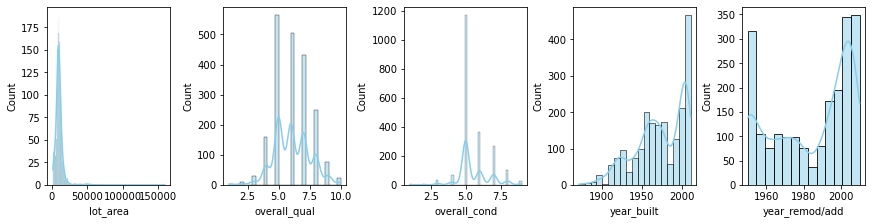

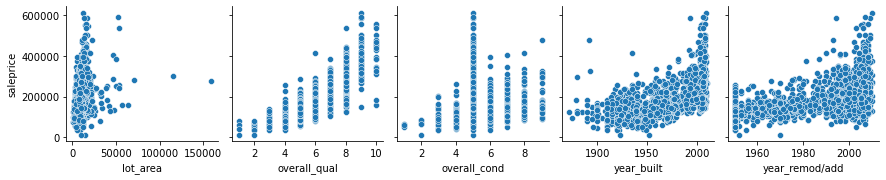

In [19]:
plot_features_numeric(df,features_numeric[:5],"saleprice")

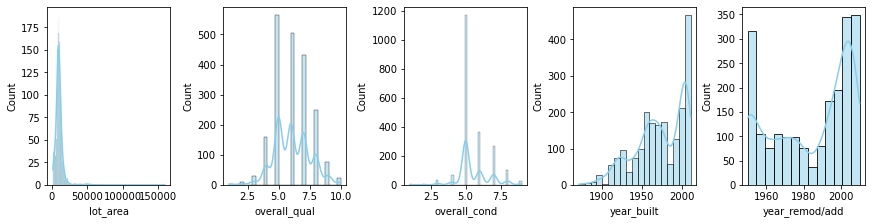

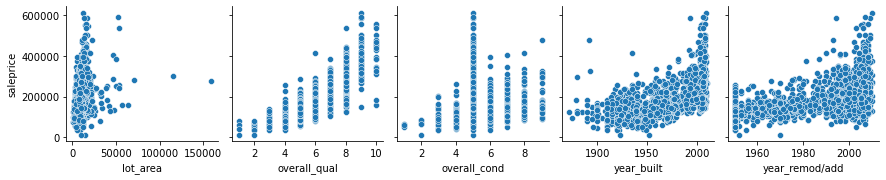

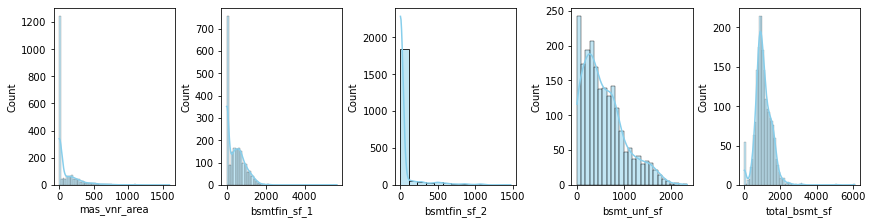

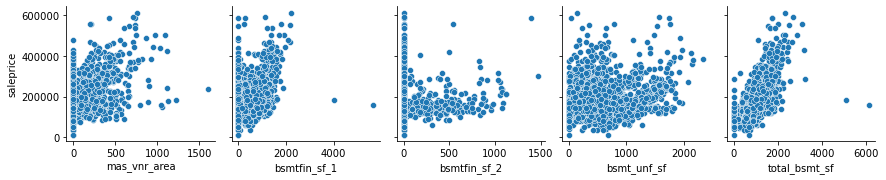

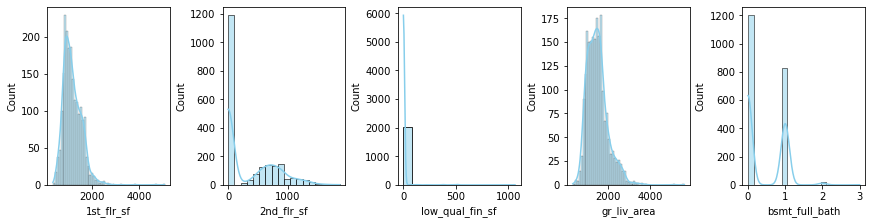

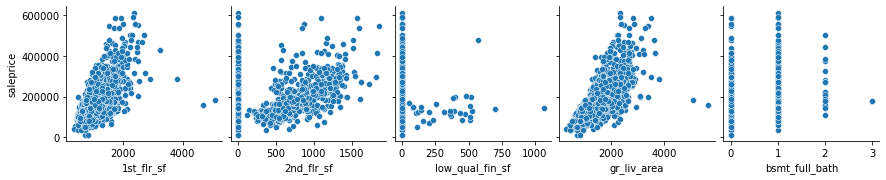

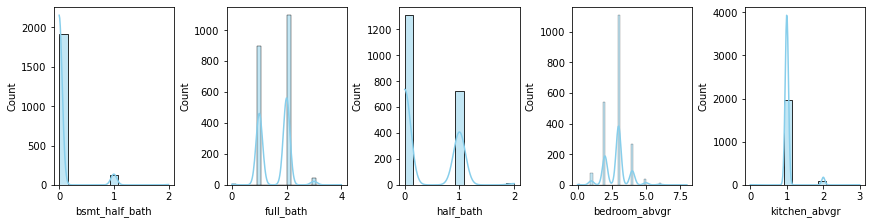

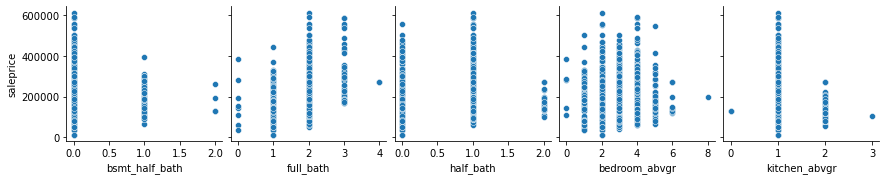

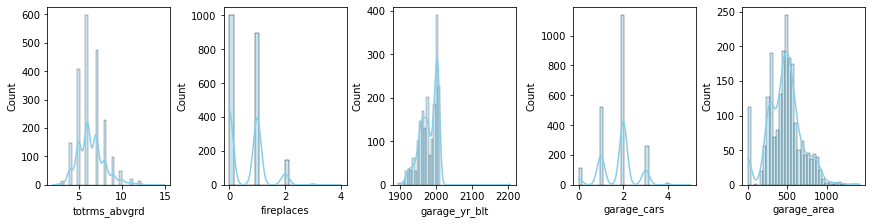

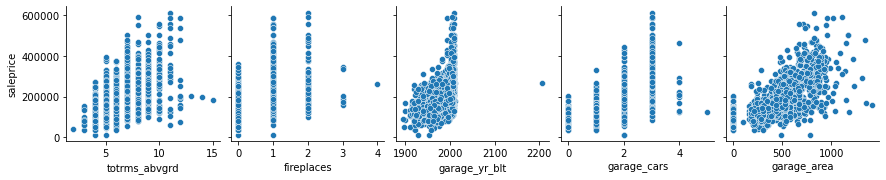

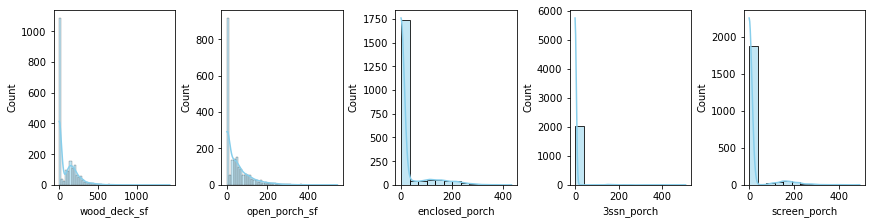

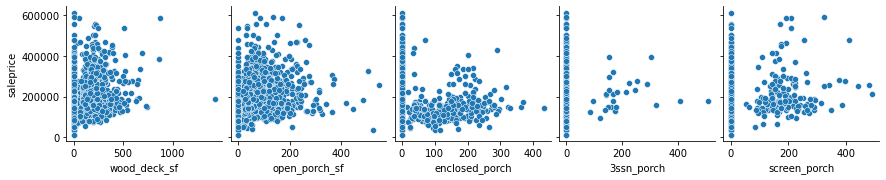

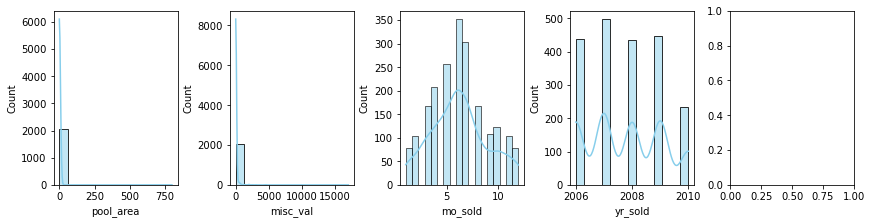

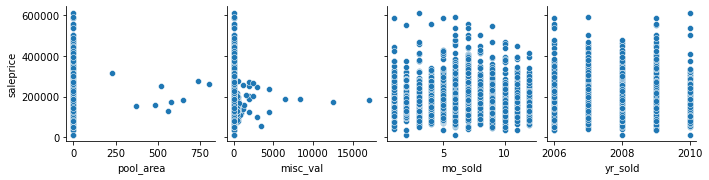

In [20]:
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_numeric)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_numeric)):
            sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
    sns.pairplot(df, x_vars=features_numeric[i:min(i+columns_in_a_row,len(features_numeric))], y_vars=["saleprice"])
    i +=columns_in_a_row

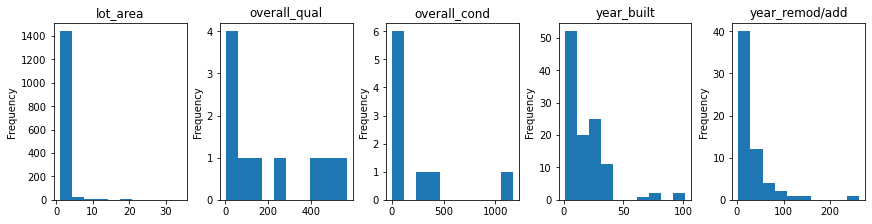

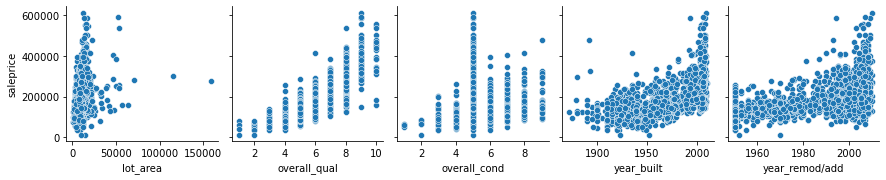

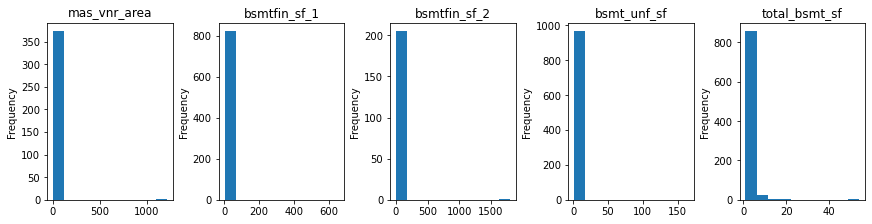

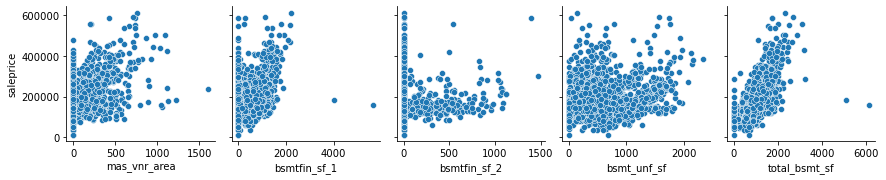

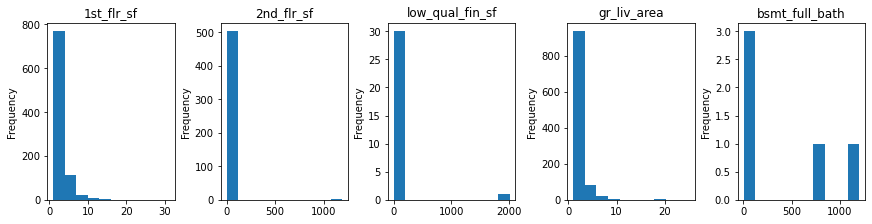

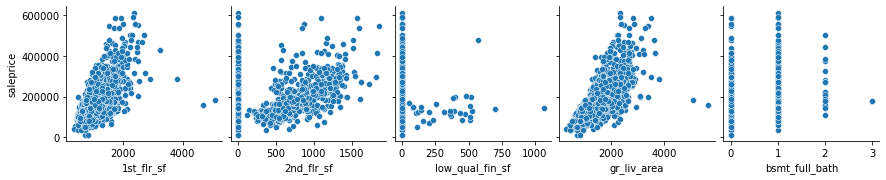

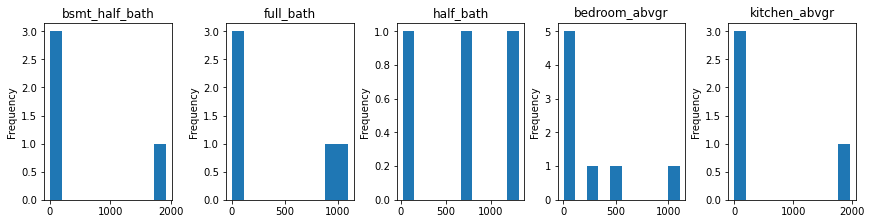

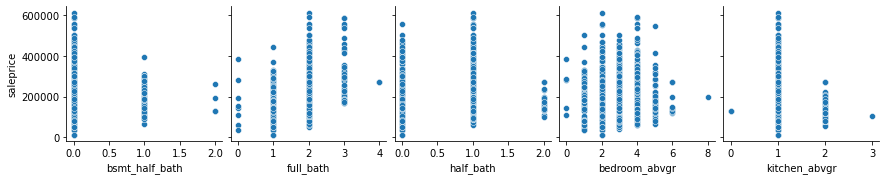

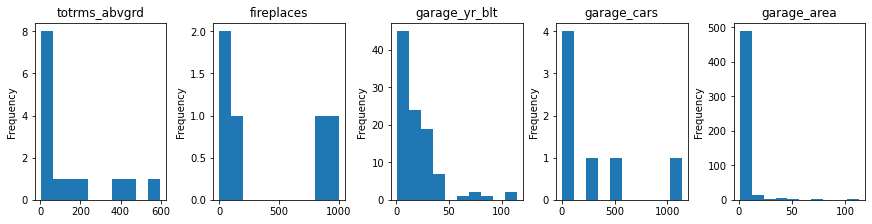

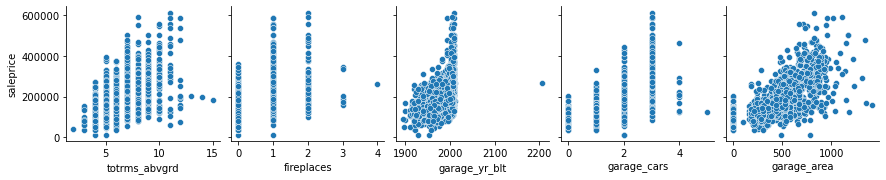

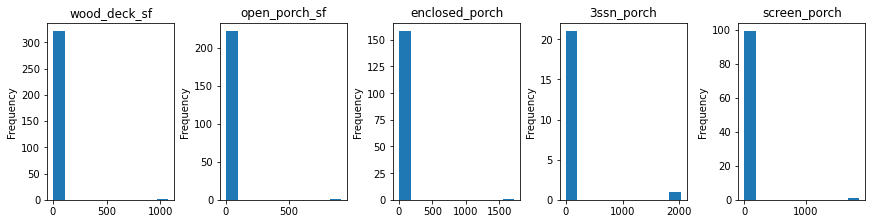

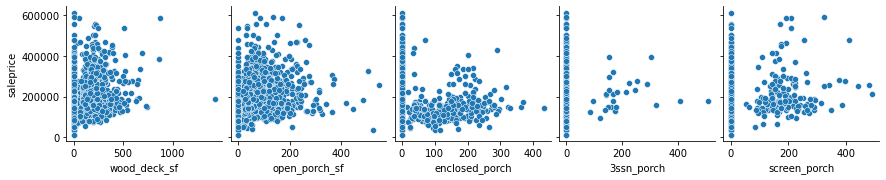

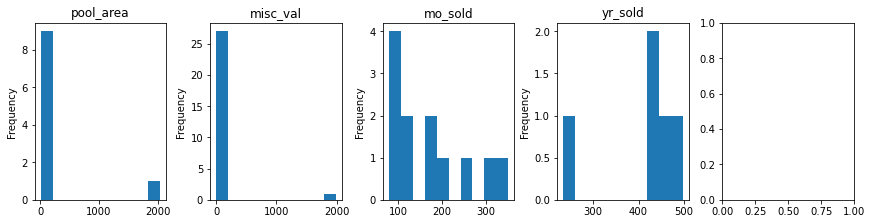

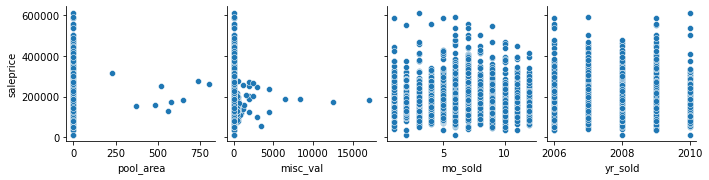

In [21]:
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_numeric)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_numeric)):
            #sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
            df[features_numeric[i+j]].value_counts(dropna=False).plot(title=features_numeric[i+j], kind='hist',ax=axs[j])
    sns.pairplot(df, x_vars=features_numeric[i:min(i+columns_in_a_row,len(features_numeric))], y_vars=["saleprice"])
    i +=columns_in_a_row

In [22]:
'''
#plot the histogram of each catagorical feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])
      
    sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])
    sns.boxplot(x="ms_subclass", y="saleprice", data=df)
    i +=columns_in_a_row
    
'''

'\n#plot the histogram of each catagorical feature and its pairplot with \'saleprice\'\ni = 0\ncolumns_in_a_row = 5\nwhile i < (len(features_catagorical)):\n    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))\n    for j in range(columns_in_a_row):\n        if i+j < (len(features_catagorical)):\n            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])\n      \n    sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])\n    sns.boxplot(x="ms_subclass", y="saleprice", data=df)\n    i +=columns_in_a_row\n    \n'

In [23]:
def plot_features_numeric(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=True, color="skyblue", ax=axs[i])
    sns.pairplot(df, x_vars=x_columns, y_vars=y_column)

In [24]:
def plot_features_catagorical(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=False, color="skyblue", ax=axs[i])
    
    fig2, axs2 = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for j in range(len(x_columns)):
         sns.boxplot(x=x_columns[j], y=y_column, data=df, ax=axs2[j])
    

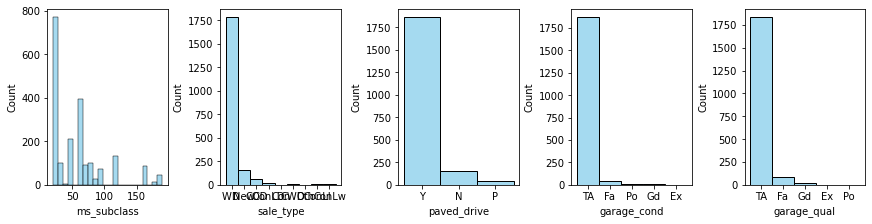

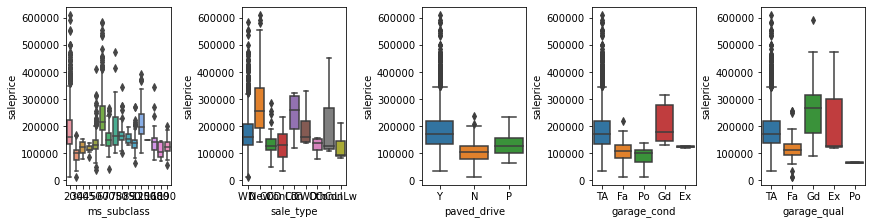

In [25]:
plot_features_catagorical(df,features_catagorical[:5], "saleprice")

In [26]:
'''
#plot the histogram of each catagorical feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])
      
    fig2, axs2 = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs2[j])
            sns.boxplot(x=features_catagorical[i+j], y="saleprice", data=df, ax=axs2[j])
            
    #sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])
   
    i +=columns_in_a_row
'''

'\n#plot the histogram of each catagorical feature and its pairplot with \'saleprice\'\ni = 0\ncolumns_in_a_row = 5\nwhile i < (len(features_catagorical)):\n    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))\n    for j in range(columns_in_a_row):\n        if i+j < (len(features_catagorical)):\n            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])\n      \n    fig2, axs2 = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))\n    for j in range(columns_in_a_row):\n        if i+j < (len(features_catagorical)):\n            #sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs2[j])\n            sns.boxplot(x=features_catagorical[i+j], y="saleprice", data=df, ax=axs2[j])\n            \n    #sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])\n   \n    i +=columns_in_a_row\n'

In [27]:
          sns.boxplot(x="ms_subclass", y="saleprice", data=df, ax=axs[j+1])

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
'''
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
            df[features_catagorical[i+j]].value_counts(dropna=False,sort=False).plot(title=features_catagorical[i+j], kind='bar',ax=axs[j])
       
    fig2, axs2 = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs2[j])
            sns.boxplot(x=features_catagorical[i+j], y="saleprice", data=df, ax=axs2[j])
     
    i +=columns_in_a_row
'''

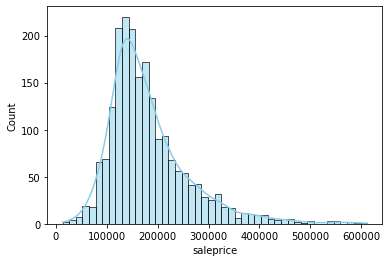

In [28]:
sns.histplot(data=df, x='saleprice', kde=True, color="skyblue")
plt.show();


In [29]:
from scipy import stats

_, p = stats.normaltest(df['saleprice'])
print(p)

4.635137528865828e-137


In [30]:
y_sqrt = (df['saleprice'])**(0.5)
_, p = stats.normaltest(y_sqrt)
print(p)

1.3775989984223007e-49


In [31]:
y_log = np.log(df['saleprice'])
_, p = stats.normaltest(y_log)
print(p)

3.415079112898754e-22


In [32]:

y_bc, lambda_bc = stats.boxcox(df['saleprice'])
_, p = stats.normaltest(y_bc)
print(p)

2.3920594213839245e-15


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lot_frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0
bsmt_unf_sf,2050.0,567.728293,444.954786,0.0,220.0,474.5,811.00,2336.0


In [34]:
print("garage_yr_blt have wrong max year: 2207")

garage_yr_blt have wrong max year: 2207


In [36]:
df.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.650270
garage_cars        0.648220
total_bsmt_sf      0.628925
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
garage_yr_blt      0.533922
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423519
lot_frontage       0.341842
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283662
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016255
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045328
overall_cond      -0.097019
kitchen_abvgr     -0.125444
enclosed_porch    -0

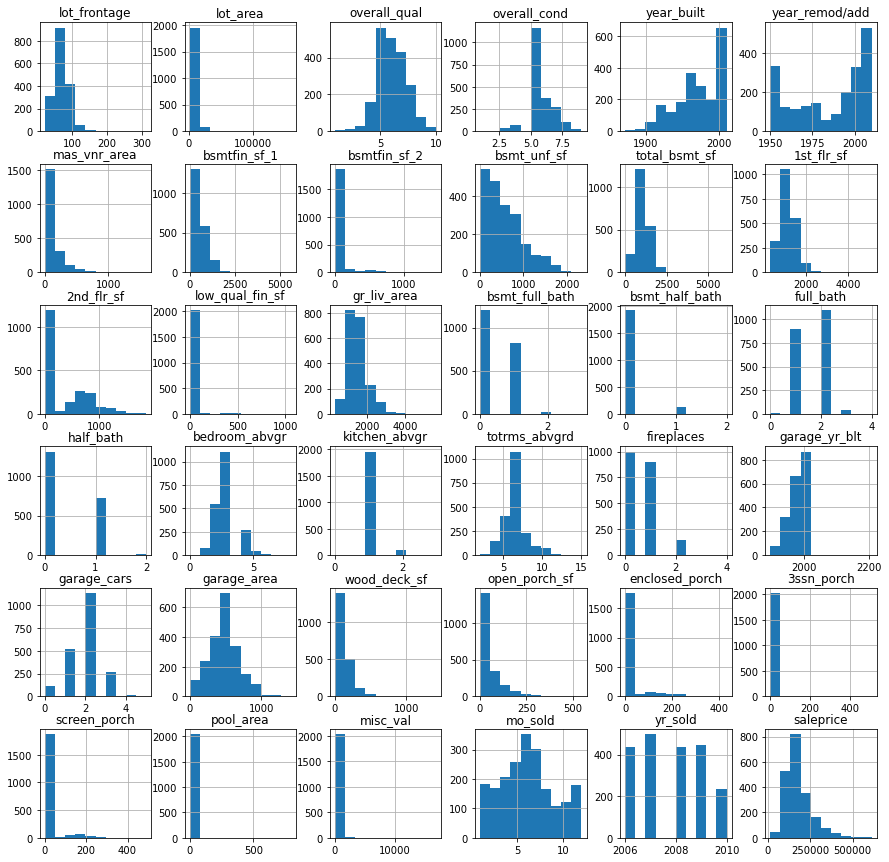

In [37]:
df.hist(figsize=(15, 15));

### EDA: Boxplots

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


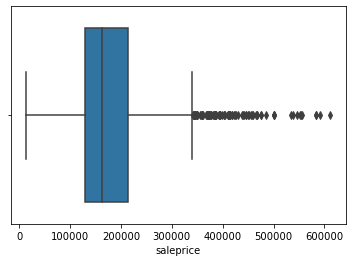

In [38]:
sns.boxplot(df['saleprice']);

In [39]:
sns.histplot(data=df, x='saleprice', kde=True, color="skyblue", ax=axs[j])
plt.show();

### get dummy the catagorical features

In [41]:
df = pd.get_dummies(df, columns=features_catagorical)

In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 292 columns):
 #    Column                Dtype  
---   ------                -----  
 0    id                    object 
 1    pid                   object 
 2    misc_feature          object 
 3    fence                 object 
 4    pool_qc               object 
 5    fireplace_qu          object 
 6    alley                 object 
 7    lot_frontage          float64
 8    lot_area              int64  
 9    overall_qual          int64  
 10   overall_cond          int64  
 11   year_built            int64  
 12   year_remod/add        int64  
 13   mas_vnr_area          float64
 14   bsmtfin_sf_1          float64
 15   bsmtfin_sf_2          float64
 16   bsmt_unf_sf           float64
 17   total_bsmt_sf         float64
 18   1st_flr_sf            int64  
 19   2nd_flr_sf            int64  
 20   low_qual_fin_sf       int64  
 21   gr_liv_area           int64  
 22   bsmt_full_bath        

In [44]:
features_dummies = df.columns[43:]
print(features_dummies)

Index(['ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45',
       'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75',
       'ms_subclass_80', 'ms_subclass_85',
       ...
       'lot_shape_Reg', 'street_Grvl', 'street_Pave', 'ms_zoning_A (agr)',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM'],
      dtype='object', length=249)


### Model Prep: Create our features matrix ( X ) and target vector ( y )

In [52]:
features_final = features_numeric.union(features_dummies,sort=False)
print(features_final)


Index(['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf',
       ...
       'lot_shape_Reg', 'street_Grvl', 'street_Pave', 'ms_zoning_A (agr)',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM'],
      dtype='object', length=283)


In [53]:
X = df[features_final]
X.head()

,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,paved_drive_N,paved_drive_P,paved_drive_Y,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,central_air_N,central_air_Y,heating_qc_Ex,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neigh

In [54]:
y = df['saleprice']
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

### fill missing data with mean

In [55]:
X.isnull().sum().sort_values(ascending=False)

garage_yr_blt           114
mas_vnr_area             22
bsmt_full_bath            2
bsmt_half_bath            2
garage_area               1
garage_cars               1
bsmtfin_sf_1              1
bsmtfin_sf_2              1
bsmt_unf_sf               1
total_bsmt_sf             1
roof_style_Flat           0
roof_style_Shed           0
roof_style_Mansard        0
roof_style_Hip            0
roof_style_Gambrel        0
roof_style_Gable          0
roof_matl_WdShake         0
roof_matl_WdShngl         0
house_style_1.5Unf        0
roof_matl_Tar&Grv         0
roof_matl_Membran         0
roof_matl_CompShg         0
roof_matl_ClyTile         0
exterior_1st_WdShing      0
exterior_1st_Wd Sdng      0
house_style_1.5Fin        0
lot_area                  0
house_style_1Story        0
bldg_type_Duplex          0
condition_2_PosA          0
condition_2_Norm          0
condition_2_Feedr         0
condition_2_Artery        0
bldg_type_TwnhsE          0
bldg_type_Twnhs           0
bldg_type_2fmCon    

In [56]:
X.fillna(X.mean(),inplace=True)

C:\Users\olive\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
X.isnull().sum().sort_values(ascending=False)

lot_area                0
roof_matl_CompShg       0
roof_style_Gable        0
roof_style_Flat         0
roof_matl_WdShngl       0
roof_matl_WdShake       0
roof_matl_Tar&Grv       0
roof_matl_Membran       0
roof_matl_ClyTile       0
roof_style_Hip          0
exterior_1st_WdShing    0
exterior_1st_Wd Sdng    0
exterior_1st_VinylSd    0
exterior_1st_Stucco     0
exterior_1st_Stone      0
exterior_1st_Plywood    0
roof_style_Gambrel      0
roof_style_Mansard      0
condition_2_Norm        0
house_style_SLvl        0
condition_2_Artery      0
bldg_type_TwnhsE        0
bldg_type_Twnhs         0
bldg_type_Duplex        0
bldg_type_2fmCon        0
bldg_type_1Fam          0
house_style_SFoyer      0
roof_style_Shed         0
house_style_2Story      0
house_style_2.5Unf      0
house_style_2.5Fin      0
house_style_1Story      0
house_style_1.5Unf      0
house_style_1.5Fin      0
exterior_1st_MetalSd    0
exterior_1st_ImStucc    0
exterior_1st_HdBoard    0
mas_vnr_type_BrkCmn     0
exterior_2nd

### Model Prep: Train/test split
We always want to have a holdout set to test our model. Use the train_test_split function to split our X and y variables into a
training set and a holdout set.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### statsmodels

In [59]:
results = sm.OLS(y_train, sm.add_constant(X_train, prepend=True)).fit()

C:\Users\olive\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     71.80
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:11:19   Log-Likelihood:                -17481.
No. Observations:                1538   AIC:                         3.545e+04
Df Residuals:                    1294   BIC:                         3.675e+04
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
lot_area                 0.8926      0.192      4.639      0.000       0.515       1.270
overall_qual          6588.5799   1008.884      6.531      0.000    4609.352    8567.808
overall_cond          5420.8696    873.716      6.204      0.000    3706.815    7134.925
year_built             287.0828     81.484      3.523      0.000     127.227     446.939
year_remod/add          39.7493     55.473      0.717      0.474     -69.078     148.577
mas_vnr_area            17.1926      5.898      2.915      0.004       5.621      28.764
bsmtfin_sf_1            14.1326      2.578      5.482      0.000       9.075      19.190
bsmtfin_sf_2             7.6364      5.320      1.436      0.151      -2.800      18.073
bsmt_unf_sf             -0.2425      2.482     -0.098      0.922      -5.113       4.628
total_bsmt_sf           21.5265      3.540      6.080      0.000      14.581      28.472
1st_flr_sf               6.6161      4.952      1.336      0.182      -3.098      16.330
2nd_flr_sf              22.3114      4.637      4.812      0.000      13.215      31.408
low_qual_fin_sf         -1.5976     10.171     -0.157      0.875     -21.551      18.356
gr_liv_area             27.3299      4.558      5.996      0.000      18.388      36.272
bsmt_full_bath        4939.7817   1818.455      2.716      0.007    1372.338    8507.225
bsmt_half_bath       -1170.4389   2809.077     -0.417      0.677   -6681.283    4340.405
full_bath             5817.8818   2120.840      2.743      0.006    1657.220    9978.544
half_bath             3566.2451   1973.242      1.807      0.071    -304.858    7437.349
bedroom_abvgr         -668.7200   1291.802     -0.518      0.605   -3202.976    1865.536
kitchen_abvgr        -9539.9586   6378.864     -1.496      0.135   -2.21e+04    2974.090
totrms_abvgrd          533.9128    917.272      0.582      0.561   -1265.590    2333.415
fireplaces            4278.3463   1354.220      3.159      0.002    1621.638    6935.054
garage_yr_blt           25.5697     54.710      0.467      0.640     -81.759     132.899
garage_cars           3217.9385   2370.838      1.357      0.175   -1433.169    7869.046
garage_area             12.3565      7.991      1.546      0.122      -3.321      28.034
wood_deck_sf             7.6424      5.865      1.303      0.193      -3.864      19.148
open_porch_sf            3.1709     11.132      0.285      0.776     -18.667      25.009
enclosed_porch          16.0303     12.367      1.296      0.195      -8.231      40.292
3ssn_porch              36.2701     24.394      1.487      0.137     -11.585      84.126
screen_porch            66.8311     11.892      5.620      0.000      43.501      90.162
pool_area                2.9037     17.939      0.162      0.871     -32.288      38.096
misc_val               -12.8267      1.064    -12.055    

In [61]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)


C:\Users\olive\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\olive\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\olive\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                  feature         VIF
0                lot_area    3.229927
1            overall_qual    6.150540
2            overall_cond    2.737041
3              year_built   17.901058
4          year_remod/add    3.990474
5            mas_vnr_area    3.171225
6            bsmtfin_sf_1         inf
7            bsmtfin_sf_2         inf
8             bsmt_unf_sf         inf
9           total_bsmt_sf         inf
10             1st_flr_sf         inf
11             2nd_flr_sf         inf
12        low_qual_fin_sf         inf
13            gr_liv_area         inf
14         bsmt_full_bath    2.713863
15         bsmt_half_bath    1.449874
16              full_bath    4.077185
17              half_bath    2.890186
18          bedroom_abvgr    3.333105
19          kitchen_abvgr    4.918167
20          totrms_abvgrd    6.084003
21             fireplaces    2.201143
22          garage_yr_blt    5.492629
23            garage_cars    9.730312
24            garage_area    9.009234
25          

,feature,coefs
0,lot_area,0.892636
1,overall_qual,6588.579853
2,overall_cond,5420.869609
3,year_built,287.082761
4,year_remod/add,39.749285


In [65]:
df_lr_params = pd.DataFrame(results.params)
df_lr_params.reset_index(inplace=True)
df_lr_params.columns = ['feature','coefs']
df_lr_params.head()

df_lr_params = pd.merge(left = df_lr_params,
                        right = vif_data, 
                        on ="feature" )

df_lr_params.sort_values(by=['coefs'],ascending=False,inplace=True)
df_lr_params.reset_index(inplace=True,drop=True)
df_lr_params.head(100)

In [66]:
df_lr_params.sort_values(by=['coefs'],ascending=False,inplace=True)
df_lr_params.reset_index(inplace=True,drop=True)
df_lr_params.head(100)

,feature,coefs,VIF
0,roof_matl_WdShngl,9.953601e+04,inf
1,neighborhood_GrnHill,9.734394e+04,inf
2,roof_matl_Membran,9.281731e+04,inf
3,roof_matl_WdShake,5.865967e+04,inf
4,garage_qual_Ex,5.587596e+04,inf
5,roof_matl_Tar&Grv,4.981410e+04,inf
6,exterior_1st_CBlock,4.333316e+04,inf
7,bsmtfin_type_2_GLQ,4.083559e+04,19.689192
8,neighborhood_StoneBr,3.471690e+04,inf
9,roof_matl_CompShg,3.422352e+04,inf


In [153]:
%%time


# define the pipeline
#scaler = StandardScaler()

# Initialze the estimators
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()

best_perc_diff = None
alphas = [0.01, 0.1, 1, 10, 100,1000]
best_alpha= None
best_gs = None

for i in range(20):
        # Initialize the hyperparameters for each dictionary
        param1 = {}
        param1['classifier'] = [model1]
        param2 = {}
        param2['classifier__alpha'] = alphas
        param2['classifier'] = [model2]
        param3 = {}
        param3['classifier__alpha'] = alphas
        param3['classifier'] = [model3]

        # create pipeline
        #pipeline = Pipeline(steps=[('scaler', scaler), ('classifier', model1)])
        pipeline = Pipeline(steps=[('classifier', model1)])
        params = [param1, param2, param3]


        # Train the grid search model
        # run GridsearchCV
        gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
        gs.fit(X_train, y_train)

        # Best performing model and its corresponding hyperparameters
        print('best performing model:', gs.best_params_)

        # MSE score for the best model
        # need to convert to positive
        # https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-
        print('Mse score: ', abs(gs.best_score_))

        # check for generalisation
        y_train_pred = gs.predict(X_train)
        y_test_pred = gs.predict(X_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        perc_diff = (mse_train - mse_test)/mse_train * 100
        print('mse of train data: ', mse_train)
        print('mse of test data: ', mse_test)
        print('diff%: ', str(perc_diff)+"%")
        
        temp_best_alpha = gs.best_params_['classifier__alpha']
        alphas = [n*temp_best_alpha/100 for n in range(50, 99)] + [n*temp_best_alpha/100 for n in range(101, 151)] 
        
        if best_alpha == None or np.abs(best_perc_diff) > np.abs(perc_diff):
            best_gs = copy.deepcopy(gs)
            best_perc_diff = perc_diff
            best_alpha = temp_best_alpha


best performing model: {'classifier': Lasso(alpha=100), 'classifier__alpha': 100}
Mse score:  1102357825.1181054
mse of train data:  533916326.5786186
mse of test data:  501499429.5151479
diff%:  6.07153133360819%
best performing model: {'classifier': Lasso(alpha=61.0), 'classifier__alpha': 61.0}
Mse score:  1086358718.179967
mse of train data:  494628420.8905305
mse of test data:  495100009.6040139
diff%:  -0.09534201707098501%
best performing model: {'classifier': Lasso(alpha=59.78), 'classifier__alpha': 59.78}
Mse score:  1086367286.1238356
mse of train data:  493527506.2257429
mse of test data:  495042293.26238155
diff%:  -0.3069306203869016%
best performing model: {'classifier': Lasso(alpha=60.97560000000001), 'classifier__alpha': 60.97560000000001}
Mse score:  1086358787.8561785
mse of train data:  494606232.45707506
mse of test data:  495098711.2917065
diff%:  -0.09956988050573813%
best performing model: {'classifier': Lasso(alpha=59.756088000000005), 'classifier__alpha': 59.756

In [154]:

print('best performing model:', best_gs.best_params_)
# check for generalisation
y_train_pred = best_gs.predict(X_train)
y_test_pred = best_gs.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
perc_diff = (mse_train - mse_test)/mse_train * 100
print('mse of train data: ', mse_train)
print('mse of test data: ', mse_test)
print('diff%: ', str(perc_diff)+"%")
        
       

best performing model: {'classifier': Lasso(alpha=61.53609756885697), 'classifier__alpha': 61.53609756885697}
mse of train data:  495118925.5874352
mse of test data:  495132316.47571987
diff%:  -0.0027045801710761856%


In [158]:
coefs = best_gs.best_estimator_.named_steps["classifier"].coef_

In [156]:
coefs_list = sorted(list(zip(features_final,coefs)),reverse=True, key=lambda x: np.abs(x[1]))

In [157]:
for i in coefs_list: 
    print(i)
    

('roof_matl_ClyTile', -412342.8833357395)
('neighborhood_GrnHill', 66286.41385779096)
('neighborhood_StoneBr', 46357.763284611945)
('roof_matl_WdShngl', 34597.90432446037)
('exter_qual_Ex', 31791.81463755806)
('neighborhood_NoRidge', 31734.034900521732)
('neighborhood_NridgHt', 27079.708110240234)
('kitchen_qual_Ex', 19714.46729821426)
('exterior_1st_BrkFace', 14186.93475813697)
('bldg_type_1Fam', 13588.164757898876)
('neighborhood_Crawfor', 13277.761322840699)
('roof_style_Mansard', -12613.247181611196)
('condition_1_PosN', 12539.201665130313)
('bsmt_exposure_Gd', 12300.843231899613)
('neighborhood_Somerst', 11472.328657190263)
('functional_Maj1', -9855.879299260849)
('neighborhood_Edwards', -9356.721522119602)
('sale_type_New', 9351.09989510383)
('bsmt_qual_Ex', 8859.157947827356)
('mas_vnr_type_BrkCmn', -8567.108594164136)
('overall_qual', 8401.147673538646)
('functional_Typ', 7689.579878010184)
('land_contour_HLS', 7664.121854619571)
('land_contour_Bnk', -6698.867780876832)
('sale_

# Multicollinearity

In [159]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

C:\Users\olive\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\olive\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\olive\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                  feature         VIF
0                lot_area    3.229927
1            overall_qual    6.150540
2            overall_cond    2.737041
3              year_built   17.901058
4          year_remod/add    3.990474
5            mas_vnr_area    3.171225
6            bsmtfin_sf_1         inf
7            bsmtfin_sf_2         inf
8             bsmt_unf_sf         inf
9           total_bsmt_sf         inf
10             1st_flr_sf         inf
11             2nd_flr_sf         inf
12        low_qual_fin_sf         inf
13            gr_liv_area         inf
14         bsmt_full_bath    2.713863
15         bsmt_half_bath    1.449874
16              full_bath    4.077185
17              half_bath    2.890186
18          bedroom_abvgr    3.333105
19          kitchen_abvgr    4.918167
20          totrms_abvgrd    6.084003
21             fireplaces    2.201143
22          garage_yr_blt    5.492629
23            garage_cars    9.730312
24            garage_area    9.009234
25          

In [163]:
df_coefs = pd.DataFrame(coefs_list)
df_coefs.columns = ["feature", 'coefs']
df_lr_params = pd.merge(left = df_coefs,
                        right = vif_data, 
                        on ="feature" )

df_lr_params.sort_values(by=['coefs'],ascending=False,inplace=True)
df_lr_params.reset_index(inplace=True,drop=True)
df_lr_params.head(100)

,feature,coefs,VIF
0,neighborhood_GrnHill,66286.413858,inf
1,neighborhood_StoneBr,46357.763285,inf
2,roof_matl_WdShngl,34597.904324,inf
3,exter_qual_Ex,31791.814638,inf
4,neighborhood_NoRidge,31734.034901,inf
5,neighborhood_NridgHt,27079.708110,inf
6,kitchen_qual_Ex,19714.467298,inf
7,exterior_1st_BrkFace,14186.934758,inf
8,bldg_type_1Fam,13588.164758,inf
9,neighborhood_Crawfor,13277.761323,inf


# LINE assumption 